# E-news Express Analysis


## Overview:
You are working at an online news site E-News Express and have been asked to analyze the the results of and A/B test.  The site believes their old landing page, or the first page customers see when entering their site, is outdated and this is causing customers to not subscribe to their news service.  They created an updated landing page in order to entice new customers and convince them to subscribe to the service. To test the effectivness of their new landing page, they performed an A/B test between the old landing page and the new landing page.  This is a process in which they send some potential customers  to the old landing page and some customers to the new landing page (100 people to each) and observe the differences (or lack there of) in how potential customers interact with the two pages .  This is a very common practice in website design as well as digital marketing and allows businesses to test a new idea before making a permenant change. 

 **Objectives**  
Your job as an analyst is to perform exploratoryy data analysis on the A/B test data to identify what variables and relationships may give insight into the performance of the pages. You have also been asked to answer several specific questions by the E-News Express Team. You will need to perform statistical analysis to answer these questions and find if the differences between the two pages are considered statictically significant (p-value < 5%) to claim that differences in performance are not due to random chance
 - **Questions**
     - Do the users spend more time on the new landing page than on the existing landing page?
     - Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
     - Does the converted status depend on the preferred language?
     - Is the time spent on the new page the same for the different language users? 


## Import all the necessary libraries

In [1]:
import pandas as pd #for data importing, cleaning, and manupulation
import numpy as np #for working with arrays 
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for visualizations
import scipy.stats as stats #for performing statistican analysis and determining statistical significance
from scipy.stats import ttest_ind #import t-test function for later analysis
from scipy.stats import chi2_contingency #imports chi squared test
from scipy.stats import levene #import the levens test
from scipy.stats import f_oneway #import the ANOVA (one-way) test

#tells python to automatically print dataframes and plots without needing a seperate print command for each
%matplotlib inline  

## Reading the Data into a DataFrame

In [2]:
#import you data and take a look at the dataframe for any obvious issues 
df=pd.read_csv('abtest.csv')

#make column names shorter for more effecient coding throughout project
df.rename(columns={'time_spent_on_the_page':'page_time', 'language_preferred':'language'}, inplace=True)
print(df)

    user_id      group landing_page  page_time converted language
0    546592    control          old       3.48        no  Spanish
1    546468  treatment          new       7.13       yes  English
2    546462  treatment          new       4.40        no  Spanish
3    546567    control          old       3.02        no   French
4    546459  treatment          new       4.75       yes  Spanish
..      ...        ...          ...        ...       ...      ...
95   546446  treatment          new       5.15        no  Spanish
96   546544    control          old       6.52       yes  English
97   546472  treatment          new       7.07       yes  Spanish
98   546481  treatment          new       6.20       yes  Spanish
99   546483  treatment          new       5.86       yes  English

[100 rows x 6 columns]


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
print(df)

#look through each column for missing values (there are none)
print(df.isnull().sum())

#look at data types ()
df.info()

#This checks how many rows and columns in dataframe. (Data has 100 rows and 6 columns)
print(df.shape)

# this code is used to see if their are any duplicated rows in the dataset (there aren't)
columns= ('user_id','group','landing_page', 'page_time', 'converted', 'language')
duplicates=df.duplicated(subset=columns, keep=False)

#Here we are testing to see if the 'group' and 'control' columns contain the exact same information.
df['group'].value_counts()
df['landing_page'].value_counts()

#check the statistical summary of the data
df.describe()

    user_id      group landing_page  page_time converted language
0    546592    control          old       3.48        no  Spanish
1    546468  treatment          new       7.13       yes  English
2    546462  treatment          new       4.40        no  Spanish
3    546567    control          old       3.02        no   French
4    546459  treatment          new       4.75       yes  Spanish
..      ...        ...          ...        ...       ...      ...
95   546446  treatment          new       5.15        no  Spanish
96   546544    control          old       6.52       yes  English
97   546472  treatment          new       7.07       yes  Spanish
98   546481  treatment          new       6.20       yes  Spanish
99   546483  treatment          new       5.86       yes  English

[100 rows x 6 columns]
user_id         0
group           0
landing_page    0
page_time       0
converted       0
language        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 

,user_id,page_time
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


  **Observations**
- We can see that none of the columns in the dataframe contain null values so we dont have to worry about removing these. 

- All columns are in the correct data type that will allow us to easily work with them.  We dont need to change any datatypes.

- There are 100 rows and 6 columns.

- There are no duplicate rows in the dataset

-  Here we can see that the 'group' column and 'landing_page' column contain the exact same information.  In the group column the 'control' output is the same as 'old' in the landing_page column. We know this because the counts of each output is the exact same and we can se vialually that these outputs always match each other in each row (i.e. 'new' with 'treatment' and 'old' with 'control'). We could remove one of the rows but it doesnt really have a negative effect on our analysis so I will leave it.  If we were working with a much larger dataset I would likely remove it in order to save space in the database. 


- We can see some basic statistics on the 'page_time' variable with our statistical summary.  For example the mean page time across both parts of the A/B test is 5.38 minutes

### Univariate Analysis

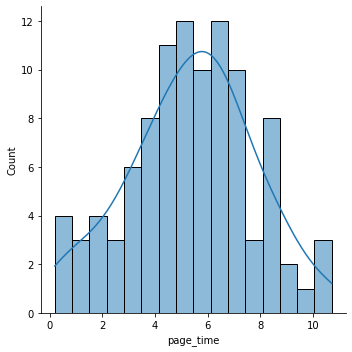

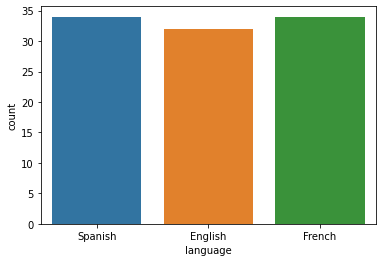

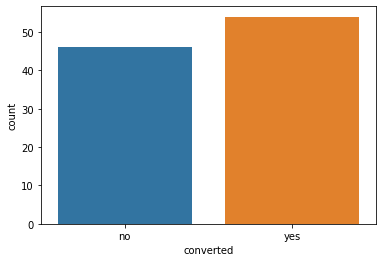

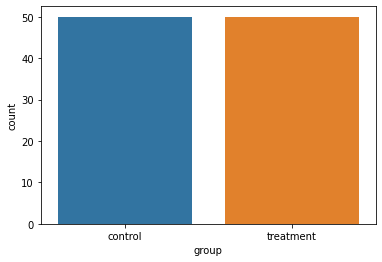

In [4]:
#here we see the distribution of the 'page_time' data
sns.displot(data=df['page_time'], kde=True, bins=16)
plt.show()

#This plot looks at the number of people in the sample who who spoke each language.
sns.countplot(data=df, x='language')
plt.show()

#This plot looks at the number of people who converted vs. didn't convert.
sns.countplot(data=df, x='converted')
plt.show()

#This plot looks at the number of people in the control group and treatment group.
sns.countplot(data=df, x='group')
plt.show()

**Observations**
- The distribution of time spent on landing page is apporximately normal
- The number is people sampled who speach english, spanish and french is similar but not exactly the same.
- For the A/B test as a whole, more people converted than people who didn't
- The sample sizes of control vs. treatment groups are confirmed to be the same.

### Bivariate Analysis

<AxesSubplot:xlabel='converted', ylabel='page_time'>

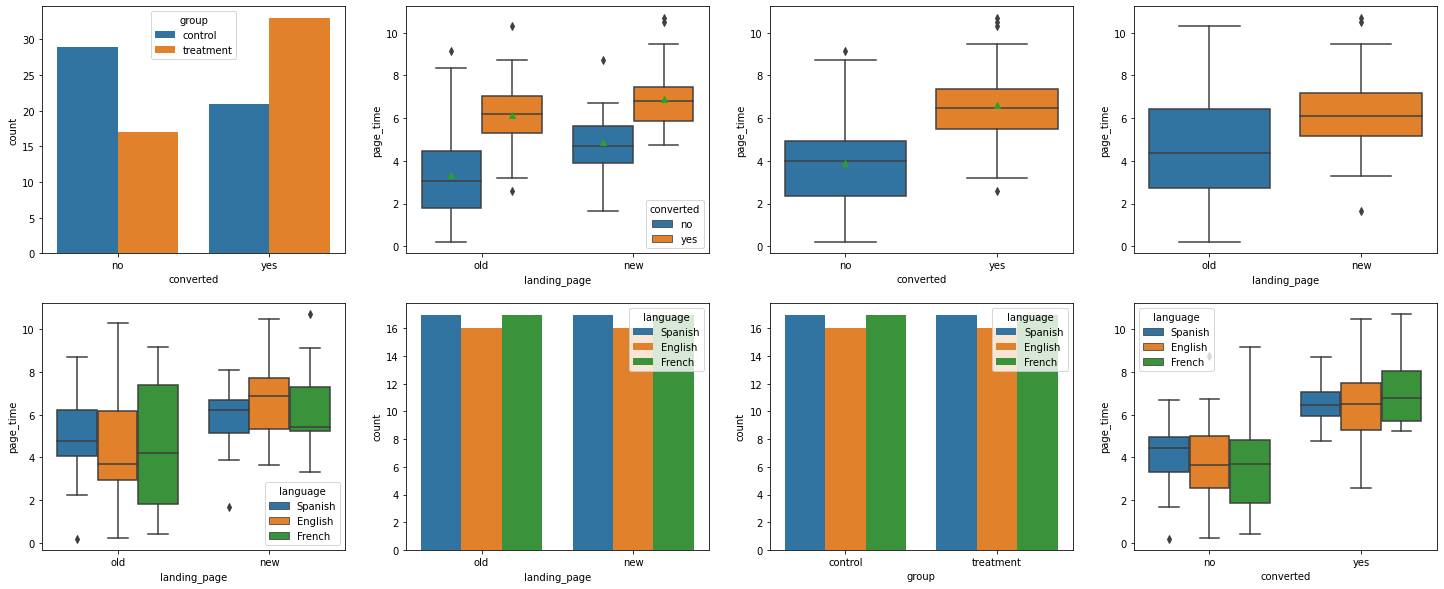

In [5]:
fig,axs = plt.subplots(2,4, figsize=(25,10))

#Here we are looking at the number of people who converted and didn't convert in the control and treatment groups.
sns.countplot(data=df, x='converted', hue='group', ax=axs[0,0])

#This looks at the relationship between landing page (new vs. old), conversion success (yes vs. no) and time spent on page.
sns.boxplot(data=df, x='landing_page', y='page_time', hue='converted', ax=axs[0,1], showmeans=True)

#This looks at the relationship between landing conversion success (yes vs. no) and time spent on page.
sns.boxplot(data=df, x='converted', y='page_time', ax=axs[0,2], showmeans=True)

#This looks at the relationship between landing page (new vs. old) and time spent on page
sns.boxplot(data=df, x='landing_page', y='page_time', ax=axs[0,3], )

#This looks at the relationship between landing page (new vs. old) and time spent on page and also how this is affected by the language of the user.
sns.boxplot(data=df, x='landing_page', y='page_time', hue='language', ax=axs[1,0])

#here we can again see that the 'landing_page' column again has the exact same data as the 'group' column.
sns.countplot(data=df, x='landing_page', hue='language', ax=axs[1,1])

#count of the sample size of the categorical variables divided by language.  Each language group has the same number of people in both the control (old) and treatment(new) groups  
sns.countplot(data=df, x='group', hue='language', ax=axs[1,2])

sns.boxplot(data=df, x='converted', y='page_time', hue='language', ax=axs[1,3])


**Observations**
- Visually, users spend more time on the new landing page compared to the old.  This relationship must be analyzed with statistical analysis to determine if we can consider it significant.

- Those who converted on both the old page and the new page seems to spend more time on the page on average.  This relationship must be analyzed with statistical analysis to determine if we can consider it significant.

- Greater time spent on the page seems to lead to greater conversion rate (across all language categories). This relationship must be analyzed with statistical analysis to determine if we can consider it significant.

- The number of people in the control vs. treatment groups are confirmed to be the same.  Also there are the same number of spanish, english, and french speakers in each group

- A simply visual analysis of the the conversion count between the control and treatment groups seeems to indicate that more people were converted on the treatment(new landing page).  We need to do more statistical analysis to verify that this visual relationship is statistically significant.  

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

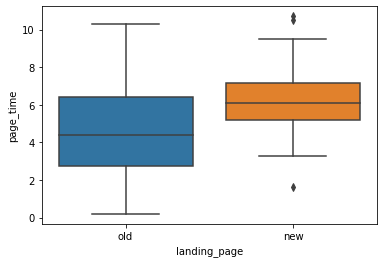

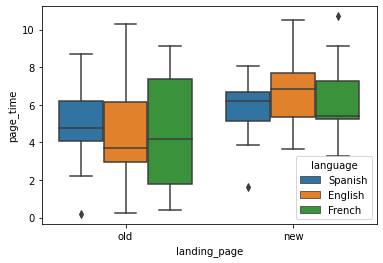

4.53
6.22


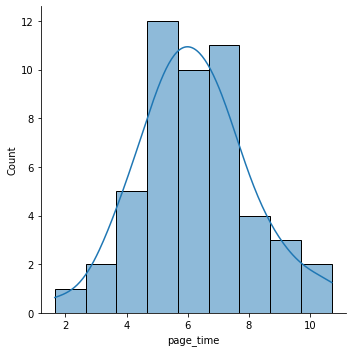

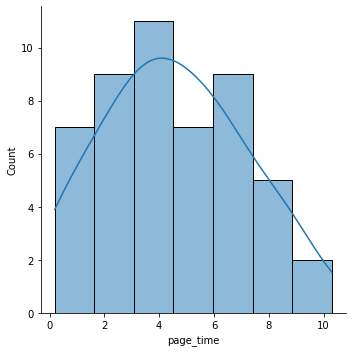

In [6]:
#This looks at the relationship between landing page (new vs. old) and time spent on page (for all languages this is true)
sns.boxplot(data=df, x='landing_page', y='page_time')
plt.show()
sns.boxplot(data=df, x='landing_page', y='page_time', hue='language')
plt.show()

#split new landing page data dn old landing page data into 2 seperate dataframes for analysis
land_old=df[df['landing_page']== 'old']
print(round(land_old['page_time'].mean(),2))
land_new=df[df['landing_page'] == 'new']
print(round(land_new['page_time'].mean(), 2))

#make sure both new datasets have approx normal distributions 
sns.displot(data=land_new, x='page_time', kde=True)
sns.displot(data=land_old, x='page_time', kde=True)

**Observations**
- Visually, users spend more time on the new landing page compared to the old.  This relationship must be analyzed with statistical analysis to determine if we can consider it significant.

- Both 'new' and 'old' landing page data have approx normal distributions

### Step 1: Define the null and alternate hypotheses

In [7]:
#We have two independent populations and we are comparing their means without knowing their standard deviations. Therefore we must use a 2 sample T-test

# Find the mean, std deviation, and sample size of page_time for old and new landing pages 
print(round(land_old['page_time'].mean(), 2))
print(round(land_old['page_time'].std(), 2))
print(land_old['page_time'].count())
print(round(land_new['page_time'].mean(), 2))
print(round(land_new['page_time'].std(), 2))
print(land_new['page_time'].count())


4.53
2.58
50
6.22
1.82
50


**Overview**
We calculated the mean and standard deviation for 'page_time' on both the 'old' and 'new' landing page, meaning we should use "2 sample equality of means T-Test".  Below is a list of the requirements that must be met in order to use this test 
- Continuous data: page_time is continuous
- Normally distributed data with n>30 for each sample: both 'old' and 'new' pages are approx normally distributed and have n>30
- Independent Populations: yes each group of new landing page and old landing page are independent of one another
- Unequal Standard deviations : yes the standard deviations calculated above are different from one another 
- Random Sampling: yes the A/B test was conducted with random sampling 

**Hypothesis**

Null hypothesis: Our null hypothesis is that users, on average, are spending an equal amount of time on both the old and new landing pages.
- 𝐻0: 𝜇(old page_time) = 𝜇(new page_time)
 
Alternate hypothesis: Our alternate hypothesis is that users, on average, are spending more time on the new landing page than the old.
- 𝐻𝑎: 𝜇(old page time) < 𝜇(new page time)

**We are using 5% as our level of significance FOR ALL STATISTICAL TESTS**
- We need a p-value of 0.05 or less to reject the null hypothesis and agree that users, on average, are spending more time on the new landing page than the old.

**Calculate the p-value of our T-Test**

In [8]:
# find the p-value using the independent T-test
test_stat, p_value = ttest_ind(land_new['page_time'],land_old['page_time'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


**Observations and Conclusions**
Our p-value is much smaller than the predetermined 5% level of significance.  This means that we can reject the null hypothesis and say that is is reasonable to assume that people spend more time on the new landing page compared to the old. 
- Due to the fact that the mean time spent on the new landing page is larger than the mean time spent on the old landing page we can assume that the design of the new landing page is better than the old. Also this difference was found to be statistically significant.  That being said, the ultimate goal of the webite is to convert cold trafic into customers by convincing them to purchase a subscription.  We need to do more analysis on the conversion data to definitavly say that the new landing page is better in all respects.  

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

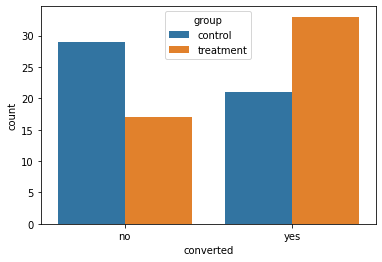

landing_page  new  old
converted             
no             17   29
yes            33   21


In [9]:
#ok I should have used a proportion-z test here because the question is asking about the proportion of converted between the two treatments.  The chi squared test tests for a relationship between two categorical variables (like in question 3) but thats not what this question is asking

#Take a look at the data you'll be analyzing
sns.countplot(data=df, x='converted', hue='group')
plt.show()
#it appears that the tratment group  (new landing page) has a greater conversion rate but we need to do a Chi-squared test to confirm the significance of this relationship.

#Create a contingency table with the count of the converted and not converted visitors on the old and new landing pages 
cont_table = pd.crosstab(df['converted'], df['landing_page'])
# display the contingency table
print(cont_table)

**Overview**
Because the conversion('yes' or 'no') and landing page('old' and 'new') variables are categorical but since we are compairing the proportion of conversions of each of these categorical variables, we must use a two way z-test. as we are compairing the proportions of converted people from two different damples (new vs. old landing page). Below are the assumo

Lets check the requirments of using a two proportion z-test:
- Binomially distributed populations
- Independent populations: yes the old and new landing pages are independent of one another
- Random Sampling: yes the A/B test was conducted with random sampling 

**Hypothesis**

Null hypothesis: Our null hypothesis is that the conversion rate between the new and old page is the same. 

- 𝐻0: Proportion converted on new landing page = Proportion converted on old landing page
 
Alternate hypothesis: Conversion rate depends on the landing_page ('old' or 'new')

- 𝐻𝑎: Proportion converted on new landing page > Proportion converted on old landing page

In [10]:
from statsmodels.stats.proportion import proportions_ztest

conversion_count= np.array([33, 21])

sample_count= np.array([50, 50])

test_stat, pvalue = proportions_ztest(conversion_count, sample_count, alternative='larger')
print(pvalue)

0.008026308204056278


**Results and Observations**
Our P-value is below our 5% level of significance and therefore we can reject our null hypothesis and say that the proportion of conversions on the new landing page is significantly larger than the old landing page. 
- Due to the fact that the new landing page has both a significantly higher conversion rate and significantly higher page time than the old landing page, we can say that the new landing page is better than the old and the site should be permenantly changed. 

## 3. Is the conversion and preferred language are independent or related?

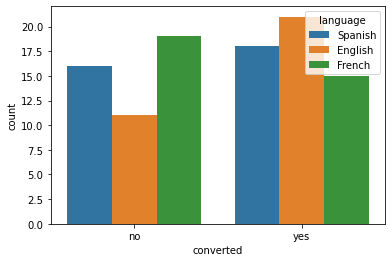

converted  no  yes
language          
English    11   21
French     19   15
Spanish    16   18


In [11]:
#visualize the relationship between language and conversion. 
sns.countplot(data=df, x='converted', hue='language')
plt.show()

#create contingency table that allows us to run chi-squared test on the two categorical variables
lang_table= pd.crosstab(df['language'], df['converted'])
print(lang_table)

#Must do Chi Squared (create contingency table counting the number of users who did and didnt convert for each)

**Overview**

Because the conversion('yes' or 'no') and language(English, Spanish, and French) variables are categorical we need to use a Chi-Squared test of independence. Therefore we need to make sure of a few parameters listed below in order to run chi-squared test.

- Categorical variables: Yes both variables are categorical 
- Sample size of at least 5 in each group: yes you can see above that there are more than 5 samples in each group
- Random Sampling: yes the A/B test was conducted with random sampling as described in the directions

**Hypothesis**

Null hypothesis: Our null hypothesis is that the conversion rate between languages is the same. 

- 𝐻0: Conversion rate is independent of language 
 
Alternate hypothesis: Conversion rate depends on the language.

- 𝐻𝑎: Conversion rate is effected (dependent) on the language 


In [12]:
#here we will run our chi-squared test on the lang_table created above
chi, p_value, dof, expected = chi2_contingency(lang_table)
print(p_value)

0.2129888748754345


**Results and Observations** 

Our p-value is above the 5% level of significance so we fail to reject the null hypothesis.
-  Our Chi-squared test tells us that the difference in conversion rates between the different languages isnt significant enough to reject the null. Therefore we must assume that differences in conversion (yes or no) is independent of the difference in language. We cannot conclude anything about cetrain languages converting differently from one another.

## 4. Is the time spent on the new page same for the different language users?

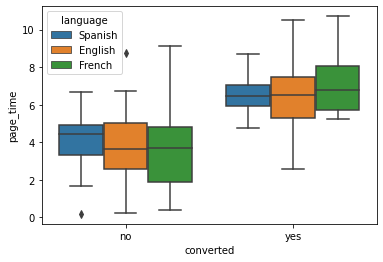

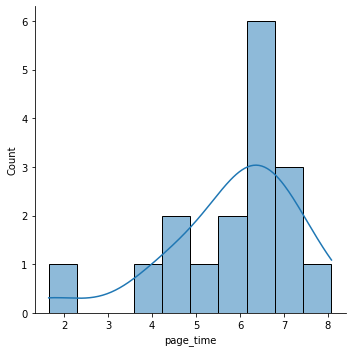

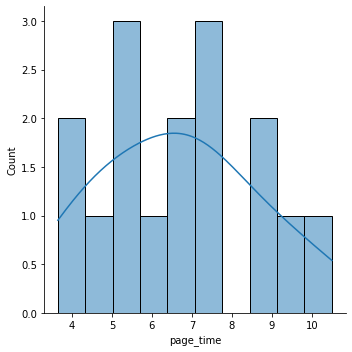

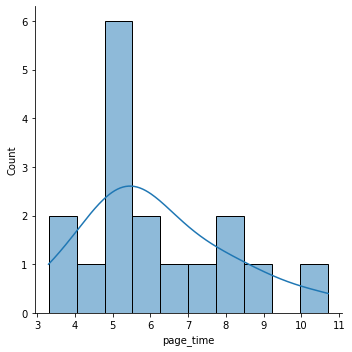

In [13]:
#here I failed to filter out all old landing page data, reread the question. here we only want to look at the new langing page time for each language.

#Visualize the data
sns.boxplot(data=df, x='converted', y='page_time', hue='language')
plt.show()
#filter out all data from the old landing page as this question is only interested in the relationship between time spent on new landing pages between languages 
df_new= df[df['landing_page']=='new']


#create dataframes for each language
df_spanish=df_new[df_new['language']=='Spanish']
df_english=df_new[df_new['language']=='English']
df_french=df_new[df_new['language']=='French']

#Visually check that the data is normally distributed (will run statistical test for this later)
sns.displot(data=df_spanish, x='page_time', kde=True, bins=10)
sns.displot(data=df_english, x='page_time', kde=True, bins=10)
sns.displot(data=df_french, x='page_time', kde=True, bins=10)
#ditributions seem to be approx normalk but must test further with Shapiro-wilks

**Overview:** We will use a One-way ANOVA test as we have to compaire more than 2 means from independent samples. 

In order for us to use the ANOVA test we must first check several assumptions
- Samples are independent simple random samples: yes the samples are both independent and randomly selected
- The group populations are normally distributed: yes they are (Shapiro-Wilks test below)
- The group populations have a common variance: yes they do (Levens test below)

**Test assumptions**
Here we will test the assumptions required to run a ANOVA test.
- The group populations are normally distributed
  - The **Shapiro-wilks Test(below):** will make sure our data is normally distributed. here are the null and alternate hypotheses for that test
  - Null hypothesis
>$H_0:$ page_time follows a normal distribution 
  -Alternative hypothesis
>$H_a:$ page_time does not follow a normal distribution


- The group populations have a common variance
  - **The Levense Test(below):**  will test if the variance in each of the language populations is the same or different. Her are the null and alternate hypothesis for that test.
  - Null hypothesis
>$H_0$: All the variances are equal
  -Alternative hypothesis
>$H_a$: At least one variance is different from the rest


In [14]:
# find the p-value using shapiro-wilks test
w, p_value = stats.shapiro(df_new['page_time']) 
print(p_value)

#find p-value of levenes test
statistic, p_value1 = levene(df_new['page_time'][df_new['language']=="English"], 
                                  df_new['page_time'][df_new['language']=="French"], 
                                  df_new['page_time'][df_new['language']=="Spanish"])
# find the p-value
print(p_value1)

0.8040016293525696
0.46711357711340173


**Results**
- the p-value of the Shapiro Wilks tests is much larger than 0.05 so we fail to reject the null hypothesis that page_time follows a normal distribution
- the p-value of the Levense test is slightly larger than 0.05 so we fail to reject null hypothesis that the languages page_times have equal variance.

**One-Way ANOVA Test** Now that our assumtions are met we can run our ANOVA for the hypotheses below

Null hypothesis: Our null hypothesis is that the mean page_time is the same for all languages
- 𝐻0: 𝜇Spanish = 𝜇English = 𝜇French 
 
Alternate hypothesis: Our null hypothesis is that the mean page_time is not the same for all languages
- 𝐻𝑎: At least one of the language means isnt the same as the others


In [15]:
# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language'] == 'English', 'page_time'],
                              df_new.loc[df_new['language'] == 'Spanish', 'page_time'],
                              df_new.loc[df_new['language'] == 'French', 'page_time'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


**Results and Conclusions** The p-value is much larger than 0.05 we cannot reject the null and must assume that all mean page_time for each language is the same. At a mninimum we must conclude that their isn't enough statistical evidence to say that they are significantly different. 
- We cannot say whether or not certain languages prefered the new landing page and must do more research and collect more data if we want to learn more.

## Conclusion and Business Recommendations

The business conclusions to be drawn from this analysis are clear.  The new landing page outperformed the old with respect to both conversion rate and average time spent on the page.  We could see these differences in our graphical analysis and the results of our statistical tests.  With that in mind, we are not able to draw any conclusions about the effect of language on conversion rate or page time.  While there seem to be slight variations in performance between the languages, these differences are not significant enough to draw any conclusions.  Perhaps a larger dataset would allow us to find significant differences between languages but for now we must assume that language and conversion rate are not correlated.  

**Recommendations** 
- E-news Express should immidiately change their landing page to the new one tested (treatment page) in this A/B test for both increased conversions and time spent on page.  
- E-news Express should collect more granular data on customers, age, location, and interestes to allow more detailed analysis.  These datapoints could be sued to further improve the landing page as well as create landing pages targeting conversions in certain demographics and customer segments.  Theri isn't much advanced analysis that can be done with such limited data. 

___